<a href="https://colab.research.google.com/github/Kuroin/Urban-Sound-Classifier-with-CNN/blob/main/urban_sound_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from tensorflow.keras import Sequential
import pickle
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import cv2

In [2]:
with open("/content/drive/MyDrive/dataset/X_train.data", 'rb') as f:
    X_train = pickle.load(f)

with open("/content/drive/MyDrive/dataset/X_test.data", 'rb') as f:
    X_test = pickle.load(f)

with open("/content/drive/MyDrive/dataset/y_train.data", 'rb') as f:
    y_train = pickle.load(f)

with open("/content/drive/MyDrive/dataset/y_test.data", 'rb') as f:
    y_test = pickle.load(f)

with open("/content/drive/MyDrive/dataset/X_val.data", 'rb') as f:
    X_val = pickle.load(f)

with open("/content/drive/MyDrive/dataset/y_val.data", 'rb') as f:
    y_val = pickle.load(f)


In [3]:
classes = {
    0 : "Air Conditier",
    1 : "Car Horn",
    2 : "Children Playing",
    3 : "Dog Bark",
    4 : "Drilling",
    5 : "Engine Idling",
    6 : "Gun Shot",
    7 : "Jackhammer",
    8 : "Siren",
    9 : "Street Music"
}

In [4]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_val = np.array(X_val)
X_test.shape

(1311, 128, 128)

In [5]:
y_train = list(map(int, y_train))
y_test = list(map(int, y_test))
y_val = list(map(int, y_val))

y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)


In [6]:
model = Sequential()

In [7]:
model.add(Conv2D(
    32,
    kernel_size=(3,3),
    strides=(1,1),
    padding="same",
    activation="relu",
    input_shape=(128,128,1)
))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(
    64,
    kernel_size=(3,3),
    strides=(1,1),
    padding="same",
    activation="relu",
))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(
    128,
    kernel_size=(3,3),
    strides=(1,1),
    padding="same",
    activation="relu",
))
model.add(MaxPooling2D(2,2))
model.add(Flatten())

model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(10,activation="softmax"))

In [8]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [9]:
results = model.fit(
    x=X_train,
    y=y_train,
    batch_size=512,
    epochs=50,
    validation_data=(X_val,y_val)
)

Epoch 1/50
12/12 [==============================] - 21s 577ms/step - loss: 2.1245 - accuracy: 0.2119 - val_loss: 1.5767 - val_accuracy: 0.7193
Epoch 2/50
12/12 [==============================] - 3s 267ms/step - loss: 1.8141 - accuracy: 0.3391 - val_loss: 1.2068 - val_accuracy: 0.7025
Epoch 3/50
12/12 [==============================] - 3s 266ms/step - loss: 1.6071 - accuracy: 0.3923 - val_loss: 1.1344 - val_accuracy: 0.6362
Epoch 4/50
12/12 [==============================] - 3s 267ms/step - loss: 1.4722 - accuracy: 0.4412 - val_loss: 1.0855 - val_accuracy: 0.5950
Epoch 5/50
12/12 [==============================] - 3s 269ms/step - loss: 1.3448 - accuracy: 0.4895 - val_loss: 1.0570 - val_accuracy: 0.6476
Epoch 6/50
12/12 [==============================] - 3s 271ms/step - loss: 1.2604 - accuracy: 0.5237 - val_loss: 0.9622 - val_accuracy: 0.6735
Epoch 7/50
12/12 [==============================] - 3s 270ms/step - loss: 1.1542 - accuracy: 0.5645 - val_loss: 0.9276 - val_accuracy: 0.6369
Epoch

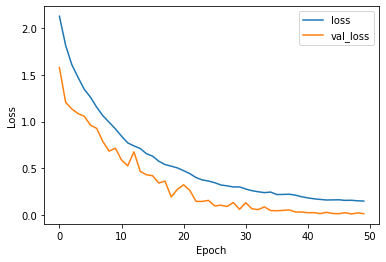

In [10]:
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend()

plt.show()

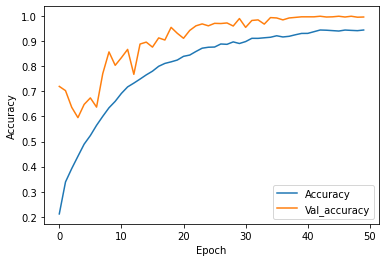

In [11]:
plt.plot(results.history["accuracy"], label="Accuracy")

plt.plot(results.history["val_accuracy"], label="Val_accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()

plt.show()

In [12]:
model.evaluate(X_test, y_test)

41/41 [==============================] - 1s 12ms/step - loss: 0.0175 - accuracy: 0.9954


[0.01747894659638405, 0.9954233169555664]

In [13]:
path=glob("/content/drive/MyDrive/spectrograms/9/*.png")

image=cv2.imread(path[16])
gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
resized_img = cv2.resize(gray,(128,128))
normalized_img=resized_img/255

prediction_result = model.predict(normalized_img.reshape(1,128,128))

predicted_class = classes[prediction_result.argmax()]
predicted_probability = prediction_result.max()
print(f"This image belongs to class {predicted_class} with {predicted_probability} probability %")

This image belongs to class Drilling with 0.9934729933738708 probability %
